# EXPLORATORY DATA ANALYSIS

Notebook para realização de analise exploratoria do dataset

## 0.0 - LOAD BASE

In [33]:
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
import nltk

### POSITIVE BASE

In [2]:
path = "../data/data_music_clean.json"
f = open(path)
data_json = json.load(f)

In [3]:
base_pos = pd.DataFrame.from_dict(data_json, orient='index')
base_pos.reset_index(inplace=True)
base_pos.columns = ["Musica", "Letra"]
print(base_pos.shape)
base_pos.head()

(322, 2)


Musica                                              Letra
0    17 Léguas e Meia  andei parar dezessete legua meia pra ir forro ...
1                2001  astronauta libertado vida ultrapassa qualquer ...
2        Abri a Porta  abri porta apareci bonita sorriu pra mim naque...
3  A Bruxa de Mentira  bruxa mentira bombom rapadura saborosa figura ...
4   Acertei No Milhar  etelvina  acertei milhar ganhei quinhentos con...

### NEGATIVE BASE

In [4]:
f_neg = open("../data/data_music_neg_clean.json")
data_json_neg = json.load(f_neg)

In [5]:
base_neg = pd.DataFrame.from_dict(data_json_neg, orient='index')
base_neg.reset_index(inplace=True)
base_neg.columns = ["Musica", "Letra"]
print(base_neg.shape)
base_neg.head()

(1684, 2)


Musica                                              Letra
0     Garota de Ipanema  olha coisa linda cheia graca menina vem passa ...
1        Águas de Março  pau  pedra  fim caminho resto toco  pouco sozi...
2  Samba De Uma Nota Só  eis aqui sambinha feito nota outras notas vao ...
3        Samba de Avião  alma canta vejo rio janeiro morrendo saudades ...
4               Querida  longa tarde  longa vida tristes flores  longa ...

### JOIN BASES

In [6]:
ones = np.ones((base_pos.shape[0],1), dtype=int)
base_pos['Class'] = ones
base_pos.head()

Musica                                              Letra  \
0    17 Léguas e Meia  andei parar dezessete legua meia pra ir forro ...   
1                2001  astronauta libertado vida ultrapassa qualquer ...   
2        Abri a Porta  abri porta apareci bonita sorriu pra mim naque...   
3  A Bruxa de Mentira  bruxa mentira bombom rapadura saborosa figura ...   
4   Acertei No Milhar  etelvina  acertei milhar ganhei quinhentos con...   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1

In [7]:
ones_n = np.zeros((base_neg.shape[0],1), dtype=int)
base_neg['Class'] = ones_n
base_neg.head()

Musica                                              Letra  \
0     Garota de Ipanema  olha coisa linda cheia graca menina vem passa ...   
1        Águas de Março  pau  pedra  fim caminho resto toco  pouco sozi...   
2  Samba De Uma Nota Só  eis aqui sambinha feito nota outras notas vao ...   
3        Samba de Avião  alma canta vejo rio janeiro morrendo saudades ...   
4               Querida  longa tarde  longa vida tristes flores  longa ...   

   Class  
0      0  
1      0  
2      0  
3      0  
4      0

In [8]:
df = pd.concat([base_pos, base_neg])
df.head()

Musica                                              Letra  \
0    17 Léguas e Meia  andei parar dezessete legua meia pra ir forro ...   
1                2001  astronauta libertado vida ultrapassa qualquer ...   
2        Abri a Porta  abri porta apareci bonita sorriu pra mim naque...   
3  A Bruxa de Mentira  bruxa mentira bombom rapadura saborosa figura ...   
4   Acertei No Milhar  etelvina  acertei milhar ganhei quinhentos con...   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1

In [9]:
df.query('Class == 0')

Musica  \
0                    Garota de Ipanema   
1                       Águas de Março   
2                 Samba De Uma Nota Só   
3                       Samba de Avião   
4                              Querida   
...                                ...   
1679                        Máquina II   
1680                         Cemitério   
1681                               Ypê   
1682                      Jóia de Jade   
1683  Monólogo Das Grandezas Do Brasil   

                                                  Letra  Class  
0     olha coisa linda cheia graca menina vem passa ...      0  
1     pau  pedra  fim caminho resto toco  pouco sozi...      0  
2     eis aqui sambinha feito nota outras notas vao ...      0  
3     alma canta vejo rio janeiro morrendo saudades ...      0  
4     longa tarde  longa vida tristes flores  longa ...      0  
...                                                 ...    ...  
1679  me m m m q u i q u i n n m m q u i q u i n n m...      0  
1680  mi mi ri ri cor cor di di osi osi ssi  ma  men...      0  
1681  contemplo rio  corre parado dancarina pedra ev...      0  
1682  trago guardada quintal dentro mim horto fechad...      0  
1683  todo mundo sabe todo mundo ve sido amigo rale ...      0  

[1684 rows x 3 columns]

In [10]:
## SHAPE AND DTYPES

df.shape

(2006, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 0 to 1683
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Musica  2006 non-null   object
 1   Letra   2006 non-null   object
 2   Class   2006 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 62.7+ KB


## 1.0 - ANALYSING PROXIMITY DATA

### WORDCLOUD FOR ALL DATASET

In [12]:
master_list = [row[1] for row in df.values]

delimiter = " "  # Delimiter to use between elements

all_words_string = delimiter.join(master_list)

all_words_string

'andei parar dezessete legua meia pra ir forro dancar ai  ai  ai  ai  ai  ai forro dancar valeu pena andar dezessete legua meia pois rosinha tava la ai  ai  ai  ai  ai  ai rosinha tava la cheguei forro moido  carne viva lapada logo socorrido tomando tres talagada ze sanfoneiro gemeu fole baiao rodei rosa terreiro  rocando coracao rodei rosa terreiro  rocando coracao ai  ai  ai tentacao astronauta libertado vida ultrapassa qualquer rota faca dei grito escuro parceiro futuro reluzente galaxia quase posso palpar vida grita emprenha reproduz velocidade luz cor ceu compoe mar azul dissolve equacao propoe computador resolve  amei velocidade casei sete planetas filho  cor espaco faco rota anoluz calculo dentro passo dor cicatriz morte quis  bracos dois mil anos nasci ter idade casado solteiro baiano estrangeiro sangue gasolina correndo magoa peito sal fruta fervendo copo d agua abri porta apareci bonita sorriu pra mim naquele instante convenci bom vida vai prosseguir vai prosseguir vai da pra

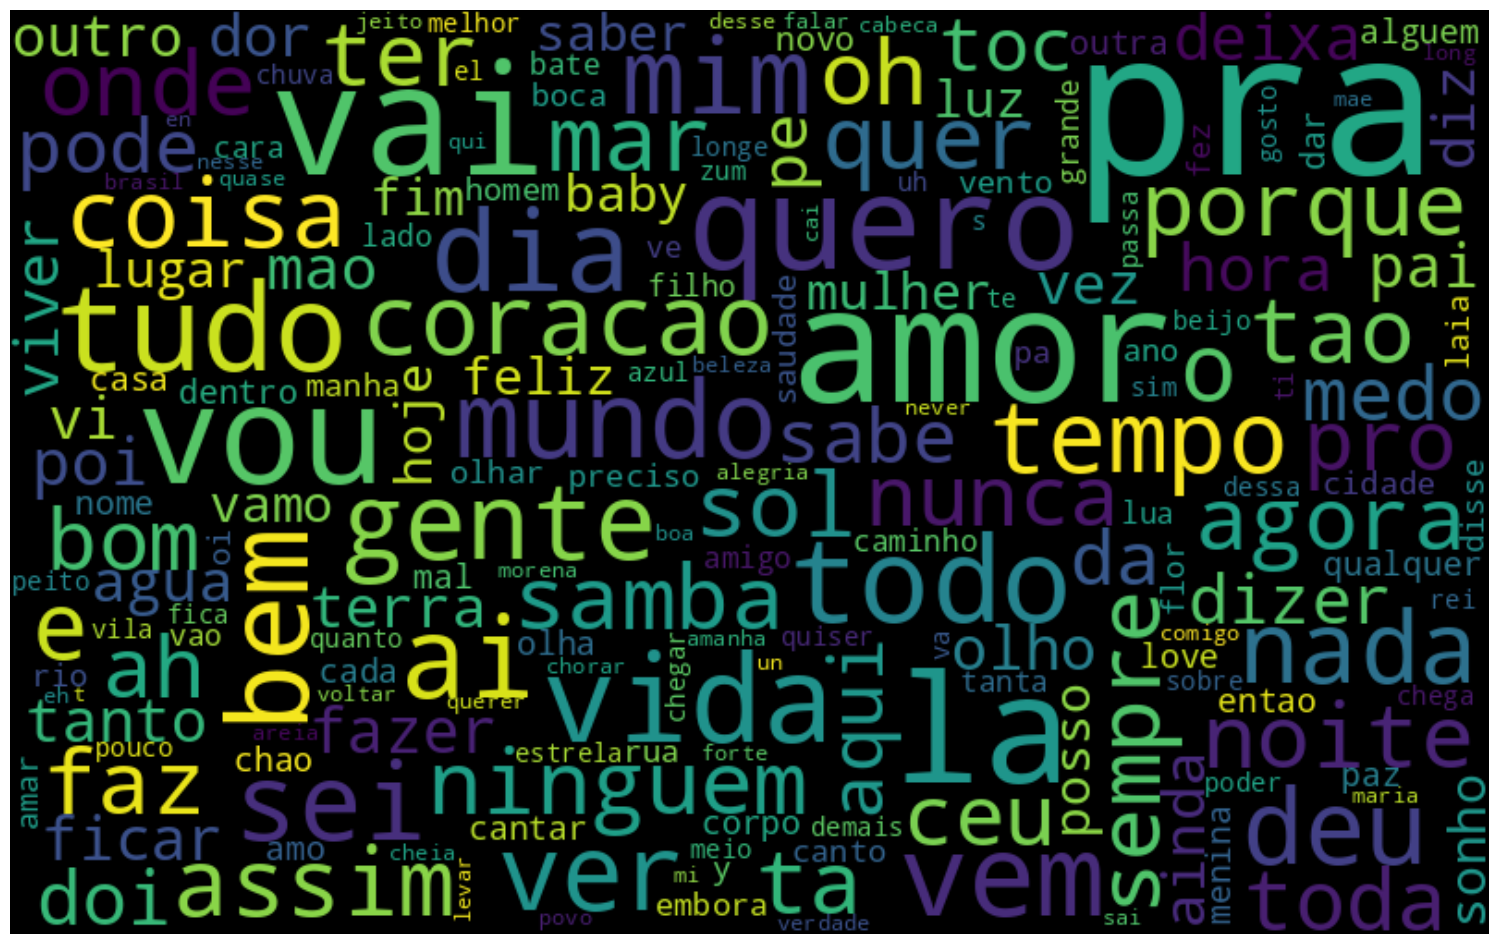

In [13]:
word_cloud = WordCloud(width= 800, height= 500,
                        max_font_size = 110,
                        collocations = False).generate(all_words_string)
# Plotando nuvem de palavras
plt.figure(figsize=(24,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### WORDCLOUD FOR POSITIVE DATASET

In [14]:
master_list = [row[1] for row in df.query('Class == 1').values]

delimiter = " "  # Delimiter to use between elements

all_words_string = delimiter.join(master_list)

all_words_string

'andei parar dezessete legua meia pra ir forro dancar ai  ai  ai  ai  ai  ai forro dancar valeu pena andar dezessete legua meia pois rosinha tava la ai  ai  ai  ai  ai  ai rosinha tava la cheguei forro moido  carne viva lapada logo socorrido tomando tres talagada ze sanfoneiro gemeu fole baiao rodei rosa terreiro  rocando coracao rodei rosa terreiro  rocando coracao ai  ai  ai tentacao astronauta libertado vida ultrapassa qualquer rota faca dei grito escuro parceiro futuro reluzente galaxia quase posso palpar vida grita emprenha reproduz velocidade luz cor ceu compoe mar azul dissolve equacao propoe computador resolve  amei velocidade casei sete planetas filho  cor espaco faco rota anoluz calculo dentro passo dor cicatriz morte quis  bracos dois mil anos nasci ter idade casado solteiro baiano estrangeiro sangue gasolina correndo magoa peito sal fruta fervendo copo d agua abri porta apareci bonita sorriu pra mim naquele instante convenci bom vida vai prosseguir vai prosseguir vai da pra

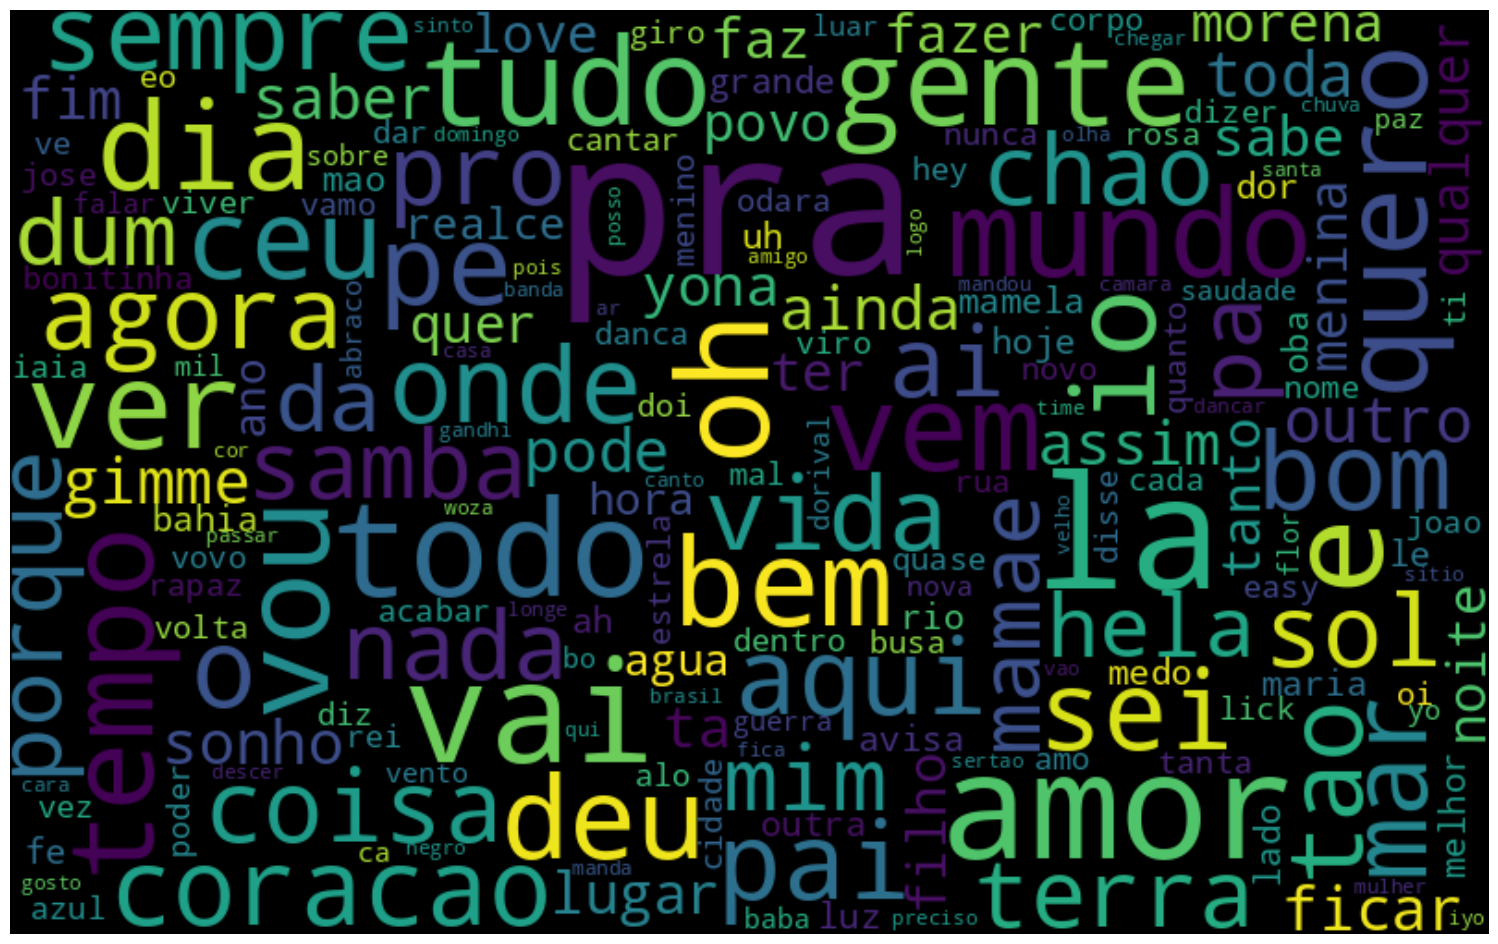

In [15]:
word_cloud = WordCloud(width= 800, height= 500,
                        max_font_size = 110,
                        collocations = False).generate(all_words_string)
# Plotando nuvem de palavras
plt.figure(figsize=(24,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
words_tokenized = word_tokenize(all_words_string)

from nltk.probability import FreqDist

frequency = FreqDist(words_tokenized)
frequency.most_common(3)

[('pra', 446), ('la', 247), ('amor', 221)]

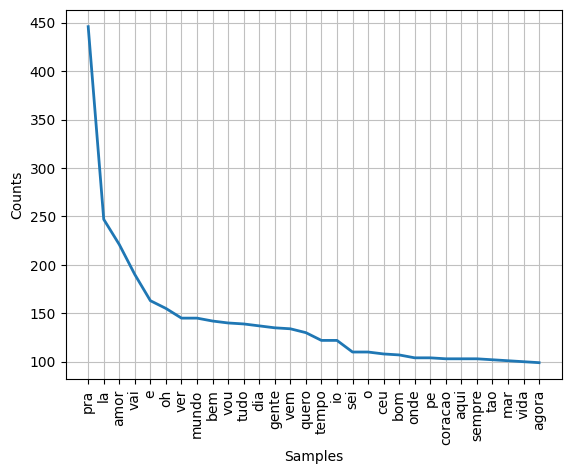

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
frequency.plot(30, cumulative = False)

### DISPERSION PLOT FOR POSITIVE DATA

In [24]:
## extraindo mais frequentes

frequency.most_common(30)

[('pra', 446),
 ('la', 247),
 ('amor', 221),
 ('vai', 190),
 ('e', 163),
 ('oh', 155),
 ('ver', 145),
 ('mundo', 145),
 ('bem', 142),
 ('vou', 140),
 ('tudo', 139),
 ('dia', 137),
 ('gente', 135),
 ('vem', 134),
 ('quero', 130),
 ('tempo', 122),
 ('io', 122),
 ('sei', 110),
 ('o', 110),
 ('ceu', 108),
 ('bom', 107),
 ('onde', 104),
 ('pe', 104),
 ('coracao', 103),
 ('aqui', 103),
 ('sempre', 103),
 ('tao', 102),
 ('mar', 101),
 ('vida', 100),
 ('agora', 99)]

In [31]:
## exibindo frequencia de palavras selecionadas

palavras_chave_pos = ['amor', 'mundo', 'tudo', 'gente', 'ceu', 'coracao', 'sempre', 'mar', 'vida', 'agora']

for p in palavras_chave_pos:
    print('{}: {}'.format(p, words_tokenized.count(p)))

amor: 221
mundo: 145
tudo: 139
gente: 135
ceu: 108
coracao: 103
sempre: 103
mar: 101
vida: 100
agora: 99


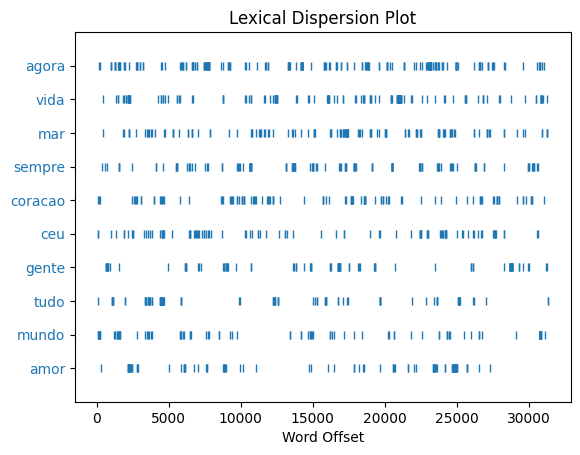

In [34]:
palavras_text = nltk.Text(words_tokenized)
palavras_text.dispersion_plot(palavras_chave_pos)

### CONCORDANCE (CONTEXT)

In [35]:
palavras_text.concordance('amor')

Displaying 25 of 221 matches:
pra la ceu azul onde sei la onde lei amor usufruir bom mel melhor comum pra qu
pra la ceu azul onde sei la onde lei amor usufruir bom mel melhor comum pra qu
gnetizou desconectada poder capricho amor amor condutor elan vital chines cham
zou desconectada poder capricho amor amor condutor elan vital chines chama ch 
l circulava ali ali gra pia batismal amor deixara fluir talvez mero defeito li
onto ponto diaadia aparecendo poucos amor sentimentos loucos amor zigzag torme
cendo poucos amor sentimentos loucos amor zigzag tormento cores alegria curva 
ando petala rosa paixao vida caminho amor linha linho amor colcha cama toalha 
paixao vida caminho amor linha linho amor colcha cama toalha mesa reproduzidos
o safras safras sonhos quilos quilos amor noutros planetas risonhos outras esp
 quanto longe terra tanto longe deus amor acabar quero sei vou ficar fim vou a
fim vou amar vida mim resolva acabar amor acabar quero sei vou ficar fim vou a
fim vou amar vida mim 

### SIMILAR TEXT DISTRIBUTION

In [39]:
palavras_text.similar('amor')

amo axe dois da vejo quer alegria baba fe sol alto mao deu assim
morrer humana todos flor comigo vivida


### COLOCATIONS

In [40]:
## search for the statistically significant collocations in a text
palavras_text.collocations()

dum dum; yona yona; hey mamela; realce realce; hela hey; quero ver;
mamela hela; lick samba; giro giro; viro viro; picapau amarelo; filhos
gandhi; chao mamae; sitio picapau; manda descer; terra pai; oba oba;
amo amo; rio janeiro; soy loco


### FIND WITH REGEX

In [41]:
palavras_text.findall("<amor> (<.*>)")

usufruir; usufruir; amor; deixara; sentimentos; zigzag; linha; colcha;
noutros; acabar; acabar; rosa; sempre; vai; acabar; acabar; jurou;
esqueceu; paz; tudo; luz; luz; possa; pra; inteiro; axe; ooooooo; dia;
dia; cais; cais; ases; guia; guia; vem; morreu; ardis; magia; sempre;
gente; aqui; aqui; aqui; aqui; oh; saiba; maior; hoje; coracao; de;
olha; dor; doralice; doralice; gente; morrer; vao; morrer; morrer;
grao; gente; morrer; vao; morrer; morrer; grao; paladar; deus; pra;
pra; pra; nesta; deixou; racha; racha; saber; amora; verdade; graca;
profissao; axe; esconde; ampara; ai; juazeiro; nasceu; porque; cigano;
arrasta; grande; capaz; vejo; vejo; sair; amor; lente; lente; capaz;
vejo; vejo; vejo; cantar; amor; lente; fazer; espanta; segura; afins;
inatingivel; anjo; existe; todo; cavou; furou; cangaceiro; amor; amor;
cantar; conhecimento; compre; morena; acabar; morena; acabar; morena;
acabar; morena; acabar; tao; morar; ameo; ameo; ameo; ameo; flutuante;
fraterno; terminado; amor; 

### WORDCLOUD FOR NEGATIVE DATASET

In [130]:
master_list = [row[1] for row in df.query('Class == 0').values]

delimiter = " "  # Delimiter to use between elements

all_words_string = delimiter.join(master_list)

all_words_string

'olha coisa linda cheia graca menina vem passa doce balanco caminho mar moca corpo dourado sol ipanema balancado poema coisa linda vi passar ah  tao sozinho  ah  tudo tao triste  ah  beleza existe beleza passa sozinha ah  soubesse  passa mundo inteirinho enche graca fica lindo causa amor causa amor causa amor    pau  pedra  fim caminho resto toco  pouco sozinho caco vidro  vida  sol noite  morte  laco  anzol peroba campo  n madeira cainga  candeia  matita pereira madeira vento  tombo ribanceira mistrio profundo queira nao queira vento ventando  fim ladeira viga  vao  festa cumeeira chuva chovendo  conversa ribeira aguas marco  fim canseira p  chao  marcha estradeira passarinho mao  pedra atiradeira ave cu  ave chao regato  fonte pedaco pao fundo poco  fim caminho rosto desgosto  pouco sozinho estrepe  prego ponta  ponto pingo pingando conta  conto peixe  gesto prata brilhando luz manha  tijolo chegando lenha  dia  fim picada garrafa cana  estilhaco estrada projeto casa  corpo cama carr

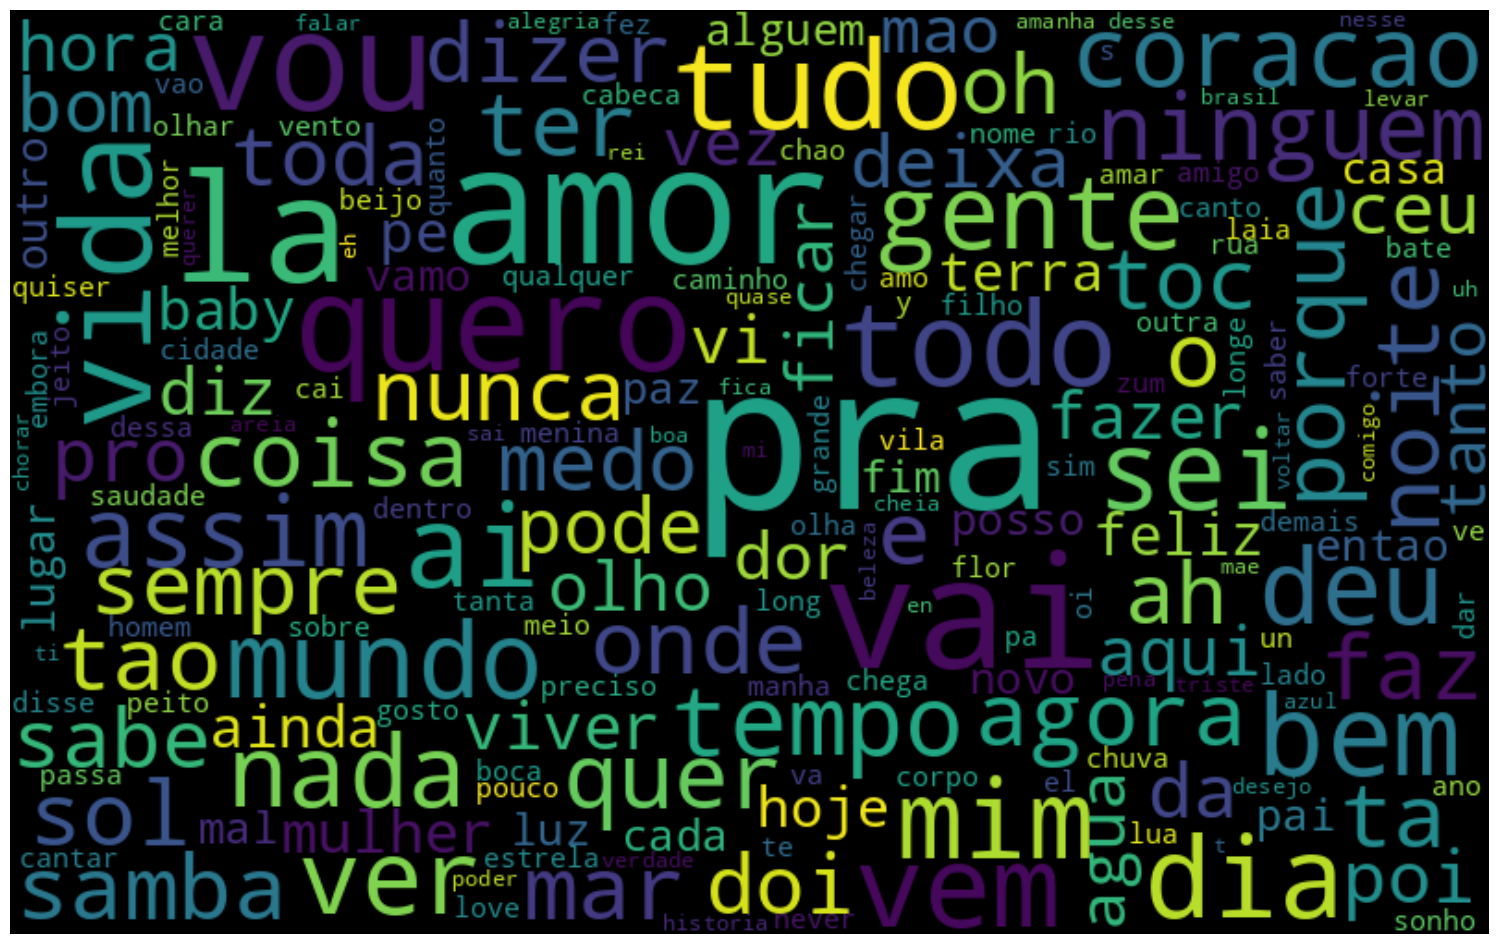

In [131]:
word_cloud = WordCloud(width= 800, height= 500,
                        max_font_size = 110,
                        collocations = False).generate(all_words_string)
# Plotando nuvem de palavras
plt.figure(figsize=(24,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [132]:
words_tokenized = word_tokenize(all_words_string)

from nltk.probability import FreqDist

frequency = FreqDist(words_tokenized)
frequency.most_common(3)

[('pra', 3347), ('amor', 2070), ('vai', 1842)]

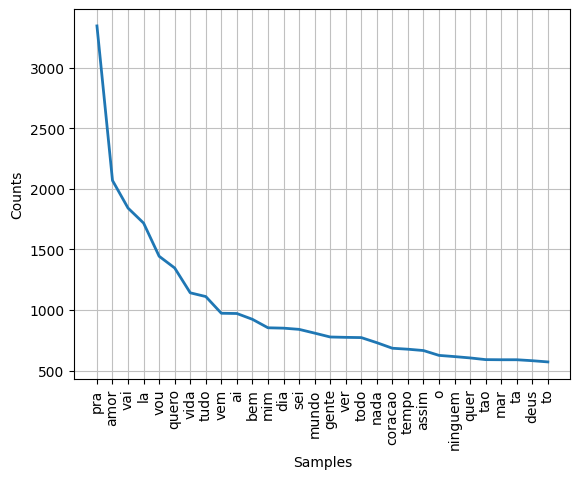

<Axes: xlabel='Samples', ylabel='Counts'>

In [133]:
frequency.plot(30, cumulative = False)

- As Top 10 palavras contém advérbios, preposições, verbos.
- Amor aparece no top em ambas as bases, ao retirar classes acima.
- A distribuição de palavras parece seguir um decaimento exponencial ([Lei de Zipf?](https://en.wikipedia.org/wiki/Zipf%27s_law))

## 2.0 - SYNTAX ANALYSIS

## 3.0 - STEAMMING